<h1>HW4</h1>

# Question 1
### (Binomial) Read the following example and complete the exercises 

#### Tossing a Biased Coin
You are asked if you want to bet on a coin. 
```
You have 10 coin tosses. 
```
```
If you get exactly 5 heads, you win 30 dollars. 
```
```
Otherwise you loss 10 dollars. 
```
```
Based on our previous observation, the coin is biased. The chance of getting head is approximately 0.4. 
```
Now you need to think about if you want to play it or not. 

### 1.1 

You recall that binomial distribution is commonly used to determine the probability of observing a specified number of successful outcomes in a specified number of trials. The equation for pdf of binomial distribution is: 

\begin{equation*}
P(X = k) = \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}
\end{equation*}

Where 
```
k: Number of successful trials
n: Total number of trials
p: Probability of success in one trial
```

Create a functon to calculate the pdf of a binomial distribution

```
Function name: binomial_p
```
```
Input: n, k, p
```
```
Output: pdf of a binomial distribution
```
```
Example: binomial_p(10, 2, 0.4) = 0.12093235199999998
```

In [12]:
import Pkg
Pkg.add("Distributions")


   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [1]:
using Distributions
function binomial_p(n,k,p)
    part1=(factorial(n))/((factorial(k).*factorial(n-k)))
    part2=*(p.^k) .*((1-p).^(n-k))
    pdf=part1.*part2
    print(pdf)
end

binomial_p (generic function with 1 method)

In [2]:
binomial_p(10,2,0.4)

0.12093235199999997

### 1.2 

Now you want to use the function to calculate the probabilities of 
1. Winning the bet
2. Losing the bet

The chance of winning the bet:

In [3]:
binomial_p(10,5,0.4)#ask about this
win=0.20065812480000006

0.20065812480000006

0.20065812480000006

The chance of losing the bet:

In [4]:
lose=1-win


0.7993418751999999

### 1.3

Would you expect yourself earning or losing money in the game?

\*Hint: What is the expected outcome

In [5]:

Expected_outcome_win=win*30



6.019743744000002

In [6]:
expected_outcome_loss=lose*10

7.993418751999998

In [7]:
total_outcome=Expected_outcome_win-expected_outcome_loss

-1.9736750079999963

You are more likely to lose money.. Because the expected outcome is negative

### 1.4

1. What if you need to get exactly 4 heads to win the game? What are the probabilities of winning and losing? 

2. Would you expect yourself earning or losing money in this case?

In [8]:
#winning
binomial_p(10,4,0.4)
win2=0.250822656
lose2=1-win2

0.250822656

0.749177344

In [11]:
(win2*30)-(lose2*10)

0.03290623999999909

The number here is not negative, so you are more likely to be winning, but its still not very high.

# Question 2
### (Chi-Square) Complete the following exercises 


#### Run the following three cells to define x, y_true, noise, and y_oberved

1. x = 0:1:10
2. y_true = 3x - 2
3. noise = N(0, $\sigma$ = 3)
4. y_observed = y_true + noise


In [10]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random", "Statistics"])

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [12]:
import Distributions as di
import Plots
import Polynomials: fit, coeffs
import Random
import Statistics

In [13]:
using Random
using Distributions

In [14]:
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;


### 2.1

1. Fit the data with a first order polynomial
2. Store the coefficients of the fitted polynomial in fit_coeff

In [15]:
using Polynomials
#ask if its two or one
fitted_p=fit(x,y_observed,1)
fit_coeff=coeffs(fitted_p)
print(fitted_p, fit_coeff)

-4.68962 + 3.17594*x[-4.689619330811521, 3.175939261198148]

### 2.2

Given $\chi^2$ defined as:
$$\chi^{2}=\sum_{i}^{N}{\frac{(y_{i}-f(x_{i},\theta))^2}{\sigma_{i}^2}}$$

Create a function to calculate Chi-square value for the $1^{st}$ order polynomial fit

```
Function name: chisqr
```
```
Input: b, m, x, y_observed, sigma
```
```
m and b are the coefficients in the first order polynomial in which m * x + b = y_fit
```
```
Output: Chi-square value of the polynomial model
```

In [47]:
function chisqr(b,m,datax,y_observed,sigma)
    return sum((y_observed.-m.*datax.-b).^2/sigma.^2)
end

chisqr (generic function with 1 method)

In [48]:
chisqr(fit_coeff[1],fit_coeff[2],x,y_observed,sigma)

4.1663571033638345

### 2.3

\* Don't define random seed anywhere in the notebook
1. Create a empty list chi2_list
2. Use a for/while loop to run through the data simulation and model fitting (as done in the previous steps) 10000 times
3. In each iteration, calculate the Chi-square value for the fitted model and add it to the chi2_list


In [37]:

chi2_list=[]
for i in 1:10000
    sigma=3
    d = di.Normal(0,sigma)
   y_observed = y_true .+ rand(d,length(x))
   fit_coeff=coeffs(fit(x,y_observed,1))
push!(chi2_list,chisqr(fit_coeff[1],fit_coeff[2],x,y_observed,sigma))
end


In [38]:
chi2_list

10000-element Vector{Any}:
  6.302303701981666
  4.030320482643237
 15.66310998142537
  6.954284587347267
  6.8507669184530435
 11.250667922533676
 13.444518637253374
  8.672500713850498
  4.634572509500823
 11.695155084363101
  6.320274280937476
  8.609140565799327
 10.645182720214473
  ⋮
  8.69418341912549
  4.429891920085263
  7.978023113387427
  5.720235550887248
  5.540323704576124
 10.667194156698843
 10.61477103312162
  5.62912279486281
  5.663671723880009
  1.3205284613383395
 10.452199609737018
  4.1663571033638345

chi2_list

### 2.4

1. Calculate the mean of chi2_list
2. Explain if the mean value (degree of freedom) make sense or not


In [21]:
using Statistics
mean(chi2_list)


8.959933902455187

N=11 and there are two parameters, so N-M=9. So yes the mean value makes sense.

### 2.5

1. Define a Chi-square distribution using the Degree of freedom from 2.4
2. Generate x_dist = 0:0.1:30
3. Calculate pdf of the Chi-square distribution using x_dist
4. Plot the chi2_list in a histogram with bin = 50 
5. Plot the pdf on top of the chi2_list histogram 

In [49]:
using Plots
x_dist = 0:0.1:30
chi2=di.Chisq(2.4)
pdf1=pdf.(chi2,x_dist)


301-element Vector{Float64}:
 0.0
 0.2845291570961844
 0.31089808882957704
 0.320716704014084
 0.32314288891359716
 0.3214118479538286
 0.3170906285701618
 0.3110699366311515
 0.30390770157026437
 0.29597667459702925
 0.28753734639733064
 0.2787777273870766
 0.26983672764828204
 ⋮
 4.925675602129605e-7
 4.6886856139317746e-7
 4.463087357287509e-7
 4.248333830322848e-7
 4.043904264836317e-7
 3.849302869930153e-7
 3.664057635711816e-7
 3.4877191941992065e-7
 3.319859734699566e-7
 3.1600719710619414e-7
 3.0079681583270934e-7
 2.863179156416372e-7

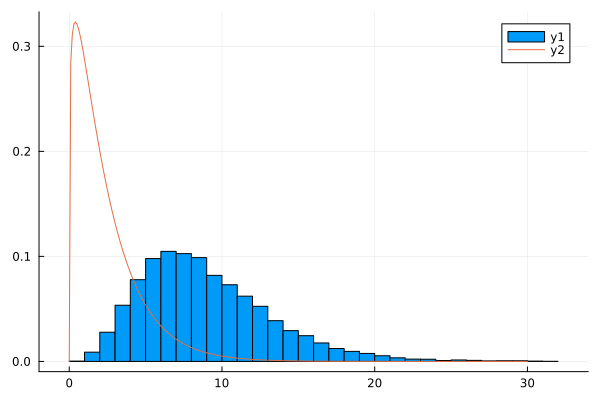

In [50]:

histogram(chi2_list, bins=50, normalize=true)
plot!(x_dist,pdf1)

### 2.6

Given the likelihood is:
$$P(\{y_{i}(x_{i})\}\mid \theta)\propto \exp\big(-\frac{\chi^2}{2}\big)$$

1. Run the following cell to create a function to calculate the likelihood (make sure you named the variables as asked in the previous questions)
2. Define m_range = 1:0.01:5
3. Define b_range = -7:0.01:3
4. Make a contour plot to visualize the distribution of the likelihood


In [24]:
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);

In [25]:
 m_range = 1:0.01:5
 b_range = -7:0.01:3

-7.0:0.01:3.0

In [26]:
p_chi2poly(1,1)

5.66230987442406e-25

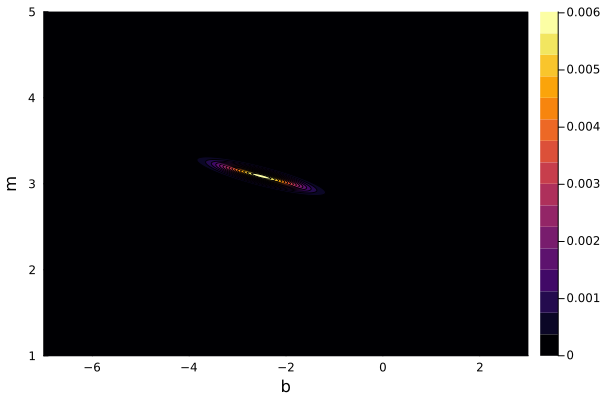

In [51]:
contourf(b_range, m_range,p_chi2poly,xlabel="b", ylabel="m")

### 2.7

1. Redefine x = 0:0.5:5 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6
2. Redefine x = 0:2:20 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6

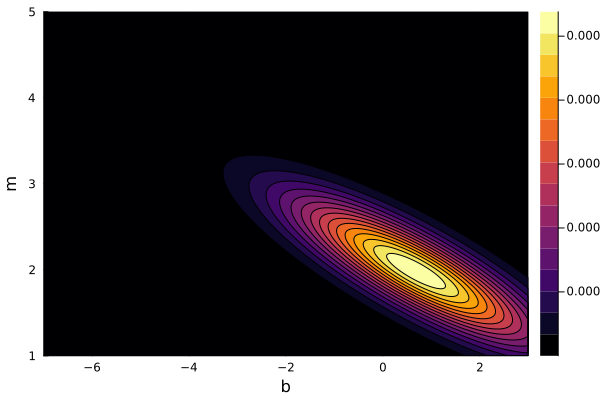

In [52]:
x1 = 0:0.5:5 
y_true2=y_true = 3 .* x1 .- 2
y_obs2 = y_true .+ noise;
chi2poly(b, m) = chisqr(b, m, x1, y_obs2, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);
contourf(b_range, m_range,p_chi2poly,xlabel="b", ylabel="m")

Plot is shifted up to the left,and the outermost ring is around the same color as .001 and the center has the same color range as 0.005

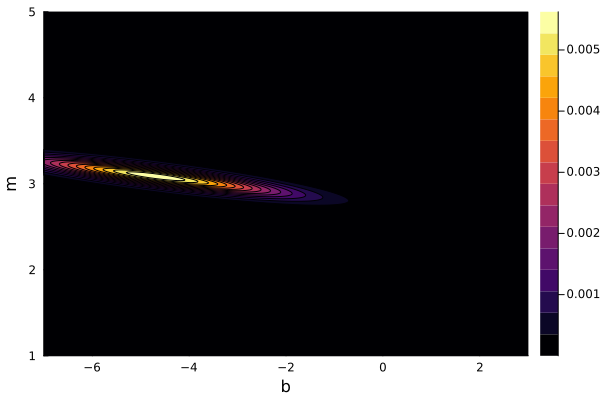

In [29]:
x2 = 0:2:20
y_true3=y_true = 3 .* x2 .- 2
y_obs3 = y_true .+ noise;
chi2poly(b, m) = chisqr(b, m, x2, y_obs3, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);
contourf(b_range, m_range,p_chi2poly,xlabel="b", ylabel="m")

Disk is shifted to the left where the center is b=-4 and m=3.5

### 2.8

Change x back to x = 0:1:10

1. Redefine sigma = 5 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6
2. Redefine sigma = 1 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6

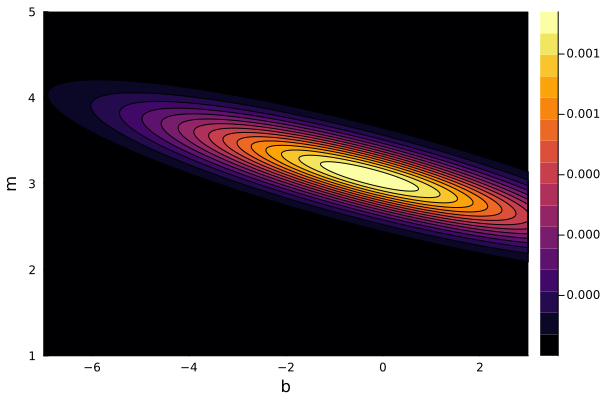

In [53]:
x = 0:1:10
sigma1=5
noise1=Random.rand(di.Normal(0,sigma1),length(x))
y_true = 3 .* x .- 2
y_obs= y_true .+ noise1;
chi2poly(b, m) = chisqr(b, m, x, y_obs, sigma1)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);
contourf(b_range, m_range,p_chi2poly,xlabel="b", ylabel="m")

size of disk is much larger center is at b=-5.

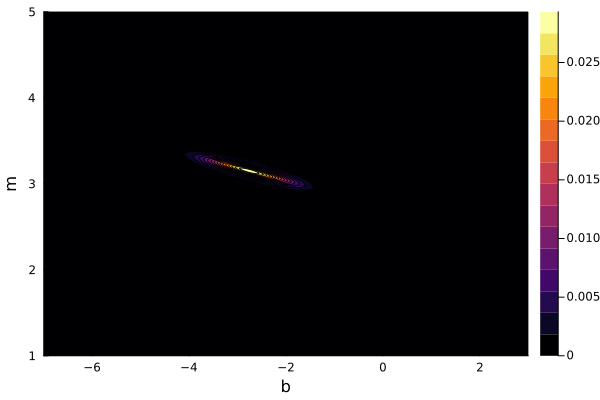

In [54]:
sigma4=1
y_true = 3 .* x .- 2
noise4 = Random.rand(di.Normal(0,sigma4),length(x))
y_ob=y_true .+ noise4;
chi2poly(b, m) = chisqr(b, m, x, y_ob, sigma4)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);
contourf(b_range, m_range,p_chi2poly,xlabel="b", ylabel="m")

size of disk is smaller,and the center is around b=-2.